# Assignement 2

### <span style="color:chocolate"> Submission requirements </span>

Your homework will not be graded if your notebook doesn't include output. In other words, <span style="color:red"> make sure to rerun your notebook before submitting to Gradescope </span> (Note: if you are using Google Colab: go to Edit > Notebook Settings  and uncheck Omit code cell output when saving this notebook, otherwise the output is not printed).

Additional points may be deducted if these requirements are not met:

    
* Comment your code;
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own;
* Try and minimize the use of the global namespace (meaning, keep things inside functions).
---

### Import libraries

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### Define functions

In [2]:
def create_1d_data(num_examples, w, b, bound):
  """Create X, Y data with a linear relationship with added noise.

  Args:
    num_examples: number of examples to generate
    w: desired slope
    b: desired intercept
    bound: lower and upper boundary of the data interval

  Returns:
    X and Y with shape (num_examples)
  """
  np.random.seed(4)  # consistent random number generation
  X = np.arange(num_examples)
  deltas = np.random.uniform(low=-bound, high=bound, size=X.shape) # added noise
  Y = b + deltas + w * X

  return X, Y

---
### Step 1: Data ingestion

Let's start by creating some artificial data using the <span style="color:chocolate">create_1d_data()</span> function defined at the top of the notebook.

In [3]:
# Define parameters
num_examples = 70
w = 2
b = 1
bound = 1

# Create data
X, Y = create_1d_data(num_examples, w, b, bound)

# Print shapes
print('Printing shape of X:', X.shape)
print('Printing first 10 elements in X:', X[:10])
print('\nPrinting shape of Y:', Y.shape)
print('Printing first 10 elements in Y:', Y[:10])

Printing shape of X: (70,)
Printing first 10 elements in X: [0 1 2 3 4 5 6 7 8 9]

Printing shape of Y: (70,)
Printing first 10 elements in Y: [ 1.93405968  3.0944645   5.94536872  7.42963199  9.39545765 10.43217899
 13.95254891 14.01246051 16.50596472 18.86958306]


---
### Step 2: Data Preprocessing

Our objectives here involve adding one more feature to X and creating data partitions.

### <span style="color:chocolate">Exercise 1:</span> Adding features (10 points)

1. Add a column of $1s$ to $X$ (this will serve as an intercept or "bias" in our modeling task later on). Note: do not create a new array, just concatenate with the current values;
2. Print the shape of the array.

In [4]:
# YOUR CODE HERE
#adding column of ones by concatenating
X = np.vstack((np.ones(X.shape[0]), X)).T
#printing shape
X.shape

(70, 2)

### <span style="color:chocolate">Exercise 2:</span> Data splits (10 points)

Using the <span style="color:chocolate">train_test_split()</span> method available in scikit-learn:
1. Split the (X,Y) data into training and test paritions by setting test_size=0.2 and random_state=1234. All the other arguments of the method are set to default values. Name the resulting arrays X_train, X_test, Y_train, Y_test;
2. Print the shape of each array.

In [5]:
# YOUR CODE HERE
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state = 1234)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("Y_train:", Y_train.shape)
print("Y_test:", Y_test.shape)

X_train: (56, 2)
X_test: (14, 2)
Y_train: (56,)
Y_test: (14,)


---
### Step 3: Exploratory data analysis (EDA)

### <span style="color:chocolate">Exercise 3:</span> Plots (10 points)

Create a side-by-side histogram for the values in Y_train and X_train. Make sure to include axes name and titles for each subplot.

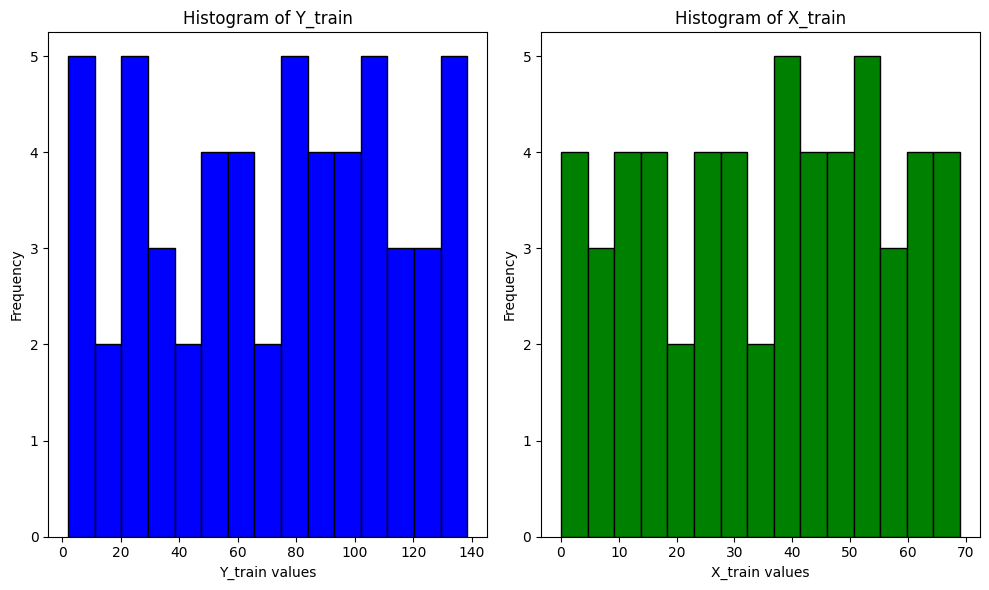

In [6]:
# YOUR CODE HERE

#creating a figure with two subplots
plt.figure(figsize = (10,6))

#Y_train histogram
plt.subplot(1,2,1)
plt.hist(Y_train, bins=15, color="blue", edgecolor="black")
plt.xlabel("Y_train values")
plt.ylabel("Frequency")
plt.title("Histogram of Y_train")

#plotting histogram for X_train exlcuding added 2nd column
plt.subplot(1,2,2)
plt.hist(X_train[:,1], bins=15, color= "green", edgecolor="black")
plt.xlabel("X_train values")
plt.ylabel("Frequency")
plt.title("Histogram of X_train")

#displaying plots
plt.tight_layout()
plt.show()

---
### Step 4: Modeling

Let's start by considering the two models proposed in Assignment 1:
1. $M_1(x) = 5+x$ 
2. $M_2(x) = 1+2x$

### <span style="color:chocolate">Exercise 4:</span> Practice with Parameters (10 points)

Perform the following computations:

1. Use matrix multiplication (np.dot) to create $M_1$ and $M_2$ (as previously defined) to produce vectors of predictions using the X_train data. Call these predictions M1_hat_train, M2_hat_train. Hint: the "learned" parameters are alredy provided to you;
3. Print the shapes of the predictions to verify that they match the shape of Y_train.

In [7]:
# YOUR CODE HERE
#defining the parameters of each model
M_1 = np.array([5, 1])
M_2 = np.array([1, 2])

#performing matrix multiplication to compute predictions for X_train
M1_hat_train = np.dot(X_train, M_1)
M2_hat_train = np.dot(X_train, M_2)

#printing shapes
print("Shape of M1_hat_train", M1_hat_train.shape)
print("Shape of M2_hat_train", M2_hat_train.shape)
print("Shape of Y_train", Y_train.shape)

Shape of M1_hat_train (56,)
Shape of M2_hat_train (56,)
Shape of Y_train (56,)


### <span style="color:chocolate">Exercise 5:</span> Learn parameters with Gradient Descent (20 points)

1. Fill in the <span style="color:green">NotImplemented</span> parts of the <span style="color:chocolate">gradient_descent()</span> function below. Hint: refer to ``02 Linear Regression_helper.ipynb file``;

2. Run this function with our artificial (X_train, Y_train) data . Set learning_rate = .0002 and num_epochs = 5. Print out the weights and loss after each epoch. 

3. Generate a plot with the loss values on the y-axis and the epoch number on the x-axis for visualization. Make sure to include axes name and title.

In [8]:
def gradient_descent(inputs, outputs, learning_rate, num_epochs):
  """Apply the gradient descent algorithm to learn learn linear regression.

  Args:
    inputs: A 2-D array where each column is an input feature and each
            row is a training example.
    outputs: A 1-D array containing the real-valued
             label corresponding to the input data in the same row.
    learning_rate: The learning rate to use for updates.
    num_epochs: The number of passes through the full training data.

  Returns:
    weights: A 2-D array with the learned weights after each training epoch.
    losses: A 1-D array with the loss after each epoch.
  """
  # m = number of examples, n = number of features
  m, n = inputs.shape
  
  # We'll use a vector of size n to store the learned weights and initialize
  # all weights to 1. 
  W = np.ones(n)
  
  # Keep track of the training loss and weights after each step.
  losses = []
  weights = []
  
  for epoch in range(num_epochs):
    # Append the old weights to the weights list to keep track of them.
    weights.append(W.copy())

    # Evaluate the current predictions for the training examples given
    # the current estimate of W. 
    predictions = np.dot(inputs, W)
    
    # Find the difference between the predictions and the actual target
    # values.
    diff = predictions - outputs
    
    # In standard linear regression, we want to minimize the sum of squared
    # differences. Compute the mean squared error loss. Don't bother with the
    # 1/2 scaling factor here.
    loss = np.mean(diff **2)

    # Append the loss to the losses list to keep a track of it.
    losses.append(loss)
    
    # Compute the gradient with respect to the loss.
    # [Formula (4) in the Gradient Descent Implementation]
    gradient = (2/m) * np.dot(inputs.T, diff)

    # Update weights, scaling the gradient by the learning rate.
    W = W - learning_rate * gradient

    #print weights after each epoch
    print(f"Epoch {epoch + 1}: Weights = {W}, Loss = {loss}")
      
  return np.array(weights), np.array(losses)

#setting parameters
learning_rate = 0.0002
num_epochs = 5

#running Gradient descent function
weights, losses = gradient_descent(X_train, Y_train, learning_rate, num_epochs)

Epoch 1: Weights = [1.01418788 1.66525772], Loss = 1665.3666608648086
Epoch 2: Weights = [1.01895194 1.88825083], Loss = 187.40513955606463
Epoch 3: Weights = [1.02055715 1.96299757], Loss = 21.34444785959595
Epoch 4: Weights = [1.02110352 1.98805237], Loss = 2.6862122844266816
Epoch 5: Weights = [1.02129496 1.99645053], Loss = 0.5898109426970145


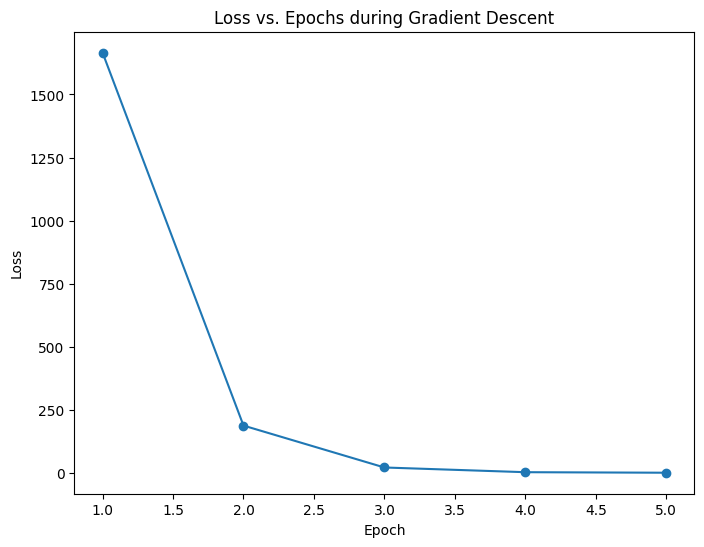

In [9]:
# YOUR CODE HERE
plt.figure(figsize=(8,6))
plt.plot(range(1, num_epochs + 1), losses, marker="o")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs. Epochs during Gradient Descent")
#plt.grid(True)
plt.show()

---
### Step 5: Hyperparameter tuning

Hyperparameter tuning plays an important role in optimizing ML models. One systematically adjusts hyperparameters to find the right balance between model complexity and generalization, ultimately leading to better predictive performance and model effectiveness.

Note that hyperparameter tuning is typically performed on **a separate validation dataset**. However, for the purposes of this assignment and based on the ML knowledge you've acquired thus far, we will perform hyperparameter tuning directly on the training data.

### <span style="color:chocolate">Exercise 6:</span> Tuning hyperparameters (10 points)

Answer the following questions:
    
1. Do you think it would be beneficial to extend the model training in Exercise 5 by increasing the learning rate to 0.02? Justify your answer;<span style="color:chocolate"> No. Even though a high learning rate can lead to faster convergence initially given the model updates its weight more significantly with each step, the updates may too large. This can cause the model to overpass the optimal point and instead of converging, the model might diverge. Increasing the loss instead of decreasing it. It might also cause the model to jump back and forth across the local minimum, or escaping the global minimum entirely. And given the small size of our dataset, I would keep the learning rate at 0.0002 </span>

2. Restoring to the previous learning_rate = .0002, would you  consider extending the model training in Exercise 5 by increasing the number of epochs to 10? Justify your answer. <span style="color:chocolate"> I wouldn't mainly due to the size of data points. Going from 5 epochs to 10 increases the ability for the model to learn and adjust it's paarameters during each round, this might also cause the model to learn the noise of the training data too well; reducing it's ability to generalize well on new or unseen data. </span>

Note: to support your answers, we recommend the following actions:
- create side-by-side subplots to show the loss at each epoch (make sure to include axes name and title), and
- print the loss at the last epoch under the following scenarios:
    - learning_rate=.0002, num_epochs=5;
    - learning_rate=.02, num_epochs=5;
    - learning_rate=.0002, num_epochs=10.

Epoch 1: Weights = [1.01418788 1.66525772], Loss = 1665.3666608648086
Epoch 2: Weights = [1.01895194 1.88825083], Loss = 187.40513955606463
Epoch 3: Weights = [1.02055715 1.96299757], Loss = 21.34444785959595
Epoch 4: Weights = [1.02110352 1.98805237], Loss = 2.6862122844266816
Epoch 5: Weights = [1.02129496 1.99645053], Loss = 0.5898109426970145
Epoch 1: Weights = [ 2.41878839 67.5257721 ], Loss = 1665.3666608648086
Epoch 2: Weights = [  -90.4006607  -4288.59461095], Loss = 7139122.1589806825
Epoch 3: Weights = [  5987.51452476 280950.89027965], Loss = 30610071189.148193
Epoch 4: Weights = [  -391995.3005066  -18396577.98716516], Loss = 131245337997012.52
Epoch 5: Weights = [2.56679857e+07 1.20461112e+09], Loss = 5.6273435758095014e+17
Epoch 1: Weights = [1.01418788 1.66525772], Loss = 1665.3666608648086
Epoch 2: Weights = [1.01895194 1.88825083], Loss = 187.40513955606463
Epoch 3: Weights = [1.02055715 1.96299757], Loss = 21.34444785959595
Epoch 4: Weights = [1.02110352 1.98805237], 

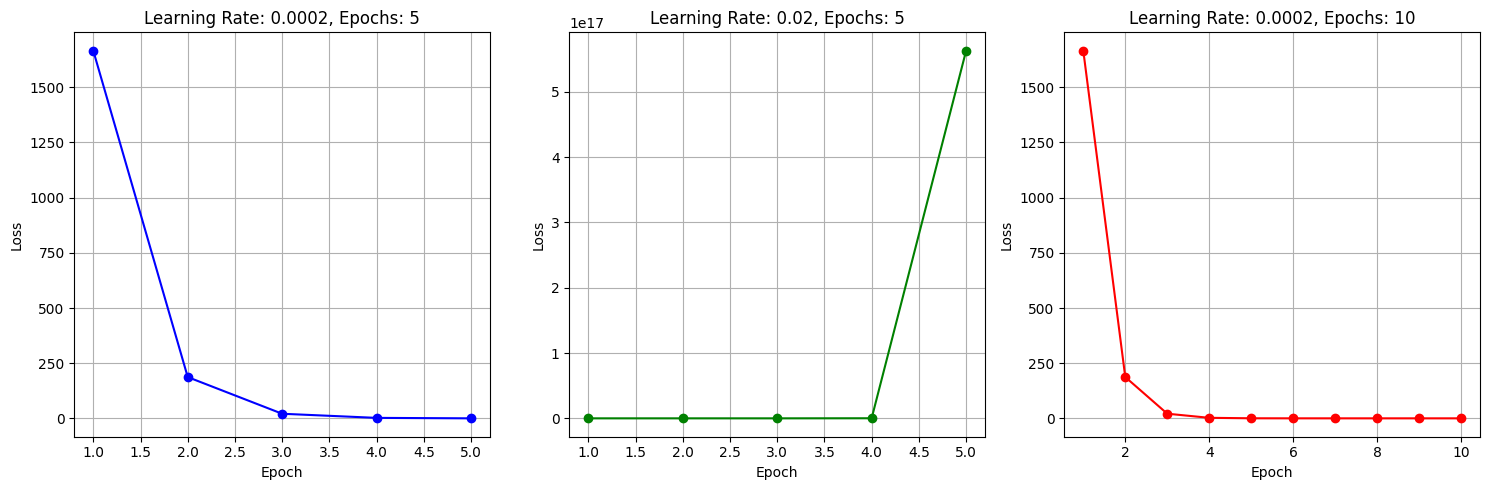

Epoch 1 Loss: 0.5898109426970145
Epoch 2 Loss: 5.6273435758095014e+17
Epoch 3 Loss 0.3244489580924435


In [10]:
# YOUR CODE HERE

# Scenario 1: learning_rate = 0.0002, num_epochs = 5
weights, losses = gradient_descent(X_train, Y_train, learning_rate, num_epochs)

#Scenario 2: learning_rate=.02, num_epochs=5;
learning_rate_2 = 0.02
num_epochs_2 = 5
weights_2, losses_2 = gradient_descent(X_train, Y_train, learning_rate_2, num_epochs_2)

#Scenario 3: learning_rate=.0002, num_epochs=10.
learning_rate_3 = 0.0002
num_epochs_3 = 10
weights_3, losses_3 = gradient_descent(X_train, Y_train, learning_rate_3, num_epochs_3)

# Plotting the results side by side
plt.figure(figsize=(15, 5))

# Plot for Scenario 1
plt.subplot(1, 3, 1)
plt.plot(range(1, num_epochs + 1), losses, marker='o', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(f'Learning Rate: {learning_rate}, Epochs: {num_epochs}')
plt.grid(True)


# Plot for Scenario 2
plt.subplot(1, 3, 2)
plt.plot(range(1, num_epochs_2 + 1), losses_2, marker='o', color='green')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(f'Learning Rate: {learning_rate_2}, Epochs: {num_epochs_2}')
plt.grid(True)

# Plot for Scenario 3
plt.subplot(1, 3, 3)
plt.plot(range(1, num_epochs_3 + 1), losses_3, marker='o', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(f'Learning Rate: {learning_rate_3}, Epochs: {num_epochs_3}')
plt.grid(True)

plt.tight_layout()
plt.show()

# Printing the loss at the last epoch for each scenario
loss_last_epoch_1 = losses[-1]
loss_last_epoch_2 = losses_2[-1]
loss_last_epoch_3 = losses_3[-1]

print("Epoch 1 Loss:", loss_last_epoch_1) 
print("Epoch 2 Loss:", loss_last_epoch_2)
print("Epoch 3 Loss", loss_last_epoch_3)

<span style="color:yellow">Scenario 1:</span> The loss decreases steadily, slowing converging towards an optimal solution reaching a final loss of 0.59.

<span style="color:yellow">Scenario 2:</span> The loss starts at a lower rate but increases dramatically and becomes extremely large by the end of the final epoch reaching a final loss of 5.63. This shows that the learning rate of 0.02 is too high, causing the model to diverge rather than converge. Because the weights are converging too drastically, it is leading to poor performance and instability in the model. 

<span style="color:yellow">Scenario 3:</span> Like scenario 1, the loss decreases steadily, and continues to do so over the 10 epochs reaching a final loss of 0.32. This is an improvement over scenario 1, indicating that extending the training with a small learning rate allows the model to refine its predictions further without overfitting. However, we will need to see how it performs with unseen data during model evaluation/testing phase. 

### <span style="color:chocolate">Exercise 7:</span> Choosing the best model (10 points)

Write down the learned model that you consider most optimal given your answers to the hyperparameter tuning exercise. Call this model $M_3(x)$.

*Based on the results from the hyperparameter tuning exercise, the model that appears most optimal is the one trained with a learning rate of 0.0002 and 10 epochs. This combination resulted in a steadily decreasing loss with no signs of divergence or overfitting.*

- The intercept term (bias) $W_0$ in $M_3(x)$ is approximately 1.02144724 
- The slope (coefficient) $W_1$​ in $M_3(x)$ is approximately 2.00066583

Making the final model for M3:

$M_3(x)$ = 1.0214 + 2.0007 . $x$



In [11]:
# YOUR CODE HERE
# Define the final learned weights from the gradient descent process
W_0 = 1.02144724  # Intercept (bias) term
W_1 = 2.00066583  # Slope (coefficient) for the feature x

M_3 = W_0 + W_1 * X_train[:,1]

---
### Step 6: Evaluation and Generalization

To evaluate our models, we assess their performance based on how closely they fit the available data. In other words, we compare the true value $y$ with the predicted value $\hat{y}$ for each $x$.

### <span style="color:chocolate">Exercise 8:</span> Computing MSE (10 points)

Assess the performance of the three models ($M_1(x)$, $M_2(x)$, $M_3(x)$) by computing the MSE metric on the training dataset. Hint: you can use the <span style="color:chocolate">mean_squared_error()</span> method available in sklearn.metrics.

In [12]:
# YOUR CODE HERE

#Computing predictions on the training dataset using 
#using only the original X values (2nd column)
M1_hat_train = 5 + X_train[:,1]
M2_hat_train = 1 + 2 * X_train[:,1]
M3_hat_train = W_0 + W_1 * X_train[:,1]

mse_M1_train = mean_squared_error(Y_train, M1_hat_train)
mse_M2_train = mean_squared_error(Y_train, M2_hat_train)
mse_M3_train = mean_squared_error(Y_train, M3_hat_train)

print("Model 1 training MSE:",mse_M1_train)
print("Model 2 training MSE:",mse_M2_train)
print("Model 3 training MSE:",mse_M3_train)

Model 1 training MSE: 1397.608983658733
Model 2 training MSE: 0.3280557752885262
Model 3 training MSE: 0.32444396065799336


### <span style="color:chocolate">Exercise 9:</span> Generalization (10 points)

Which of the three models ($M_1(x)$, $M_2(x)$, $M_3(x)$) demonstrates better generalization ability?

In [13]:
# YOUR CODE HERE
#Computing predictions on the training dataset using 
#using only the original X values (2nd column)
M1_hat_test = 5 + X_test[:,1]
M2_hat_test = 1 + 2 * X_test[:,1]
M3_hat_test = W_0 + W_1 * X_test[:,1]

mse_M1_test = mean_squared_error(Y_test, M1_hat_test)
mse_M2_test = mean_squared_error(Y_test, M2_hat_test)
mse_M3_test = mean_squared_error(Y_test, M3_hat_test)

print("Model 1 test MSE:", mse_M1_test)
print("Model 2 test MSE:", mse_M2_test)
print("Model 3 test MSE:", mse_M3_test)

Model 1 test MSE: 1113.6003911560044
Model 2 test MSE: 0.2908006971666422
Model 3 test MSE: 0.29736402278924146


Model 2 demonstrates the best generalization ability, as it has the lowest MSE on the test dataset. While model 3 is very close in performance, model 2 actually generalizes slightly better to new data. This suggests that the algorithm reaches it's optimal balance between the learning rate and number of epochs at a learning rate of 0.0002 with 5 epochs. At 5 epochs, the model has learned enough from the data to generalize well without overfitting. Increasing the number of epochs to 10 as in model 3 slightly improved the fit on the training data but didn't result in better generalization on the test data.

----
#### <span style="color:chocolate">Additional practice question</span> (not graded)

1. How does stochastic gradient descent (SGD) differ from the gradient descent (GD) approach implemented in Exercise 5?
2. Determine the optimal weights for model $M_3(x)$ using SGD. Does SGD converge more rapidly? Explain the reasons for your answer.

In Gradient Descent, the algorithm computes the gradient of the loss function all of the training data at once, so each update to the model's parameters is made after evaluating the entire dataset. Making fewer updates (one per epoch) with each update being precise. 

In Stochastic Gradient Descent, the model's parameters are only updated for each training example rather than the whole dataset. This means faster updates leading to noiser path to convergence since each update is based on a single data point.

In [14]:
# YOUR CODE HERE
# Define the SGD function to dtermine the optimal weights
def stochastic_gradient_descent(inputs, outputs, learning_rate, num_epochs):
    """Apply the stochastic gradient descent algorithm to learn linear regression.

    Args:
        inputs: A 2-D array where each column is an input feature and each
                row is a training example.
        outputs: A 1-D array containing the real-valued
                 label corresponding to the input data in the same row.
        learning_rate: The learning rate to use for updates.
        num_epochs: The number of passes through the full training data.

    Returns:
        weights: The learned weights after training.
        losses: A list of the loss after each epoch.
    """
    m, n = inputs.shape
    W = np.ones(n)  # Initialize weights
    losses = []

    for epoch in range(num_epochs):
        for i in range(m):
            xi = inputs[i, :]
            yi = outputs[i]
            prediction = np.dot(xi, W)
            error = prediction - yi
            gradient = xi * error
            W = W - learning_rate * gradient

        # Compute the loss for this epoch (over the whole dataset)
        predictions = np.dot(inputs, W)
        loss = np.mean((predictions - outputs) ** 2)
        losses.append(loss)
        print(f'Epoch {epoch + 1}: Weights = {W}, Loss = {loss}')
      
    return W, losses

# Running SGD with the same learning rate and epochs
learning_rate_sgd = 0.0002
num_epochs_sgd = 5

# Determine the optimal weights for model M_3(x) using SGD
W_sgd, losses_sgd = stochastic_gradient_descent(X_train, Y_train, learning_rate_sgd, num_epochs_sgd)

# Compare with the batch gradient descent results
W_sgd, losses_sgd[-1]  # Final weights and loss after SGD


Epoch 1: Weights = [1.01840836 1.99187664], Loss = 0.4553805674080858
Epoch 2: Weights = [1.01872263 1.99186953], Loss = 0.45537250087296105
Epoch 3: Weights = [1.01903602 1.99186245], Loss = 0.45536450601569645
Epoch 4: Weights = [1.01934852 1.99185539], Loss = 0.4553565823580731
Epoch 5: Weights = [1.01966015 1.99184834], Loss = 0.4553487294252775


(array([1.01966015, 1.99184834]), 0.4553487294252775)

In [15]:
# YOUR ANSWER HERE

# Final weights obtained from SGD
W_sgd = np.array([1.01966015, 1.99184834])  # Example values from your output

# Compute predictions on the test dataset
M3_hat_test_sgd = np.dot(X_test, W_sgd)

# Calculate the MSE for model M_3(x) on the test dataset using SGD
mse_M3_test_sgd = mean_squared_error(Y_test, M3_hat_test_sgd)

# Print the test MSE for the model trained with SGD
print(f'MSE on Test Data using SGD: {mse_M3_test_sgd}')


MSE on Test Data using SGD: 0.34680628508117206
